In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt

In [2]:
#Store the data into a variable 
import csv

fname = "AAPL.csv"
file = pd.read_csv(fname)

file = file.set_index(pd.DatetimeIndex(file['Date'].values))
file

,Date,Open,High,Low,Close,Adj Close,Volume
2019-11-21,2019-11-21,65.922501,66.002502,65.294998,65.502502,64.414268,121395200
2019-11-22,2019-11-22,65.647499,65.794998,65.209999,65.445000,64.357727,65325200
2019-11-25,2019-11-25,65.677498,66.610001,65.629997,66.592499,65.486168,84020400
2019-11-26,2019-11-26,66.735001,66.790001,65.625000,66.072502,64.974815,105207600
2019-11-27,2019-11-27,66.394997,66.995003,66.327499,66.959999,65.847565,65235600
...,...,...,...,...,...,...,...
2020-11-16,2020-11-16,118.919998,120.989998,118.150002,120.300003,120.300003,91183000
2020-11-17,2020-11-17,119.550003,120.669998,118.959999,119.389999,119.389999,74271000
2020-11-18,2020-11-18,118.610001,119.820000,118.000000,118.029999,118.029999,76322100
2020-11-19,2020-11-19,117.589996,119.059998,116.809998,118.639999,118.639999,74113000


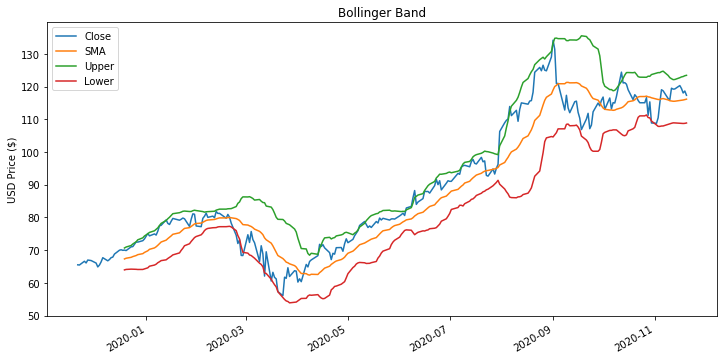

In [5]:
#Calculate the simple moving average, standard deviation upper band and lower band 
#Get the time period (20 day)
period = 20 

#Simple Moving Average(SMA)
file['SMA'] = file['Close'].rolling(window = period).mean()
#Standard deviation
file['STD'] = file['Close'].rolling(window = period).std()
#Upper Bollinger band 
file['Upper'] = file['SMA'] + (file['STD'] * 2)
#Lower Bollinger band 
file['Lower'] = file['SMA'] - (file['STD'] * 2)

column_list = ['Close', 'SMA', 'Upper', 'Lower']

file[column_list].plot(figsize=(12,6))
plt.title('Bollinger Band')
plt.ylabel('USD Price ($)')
plt.show()

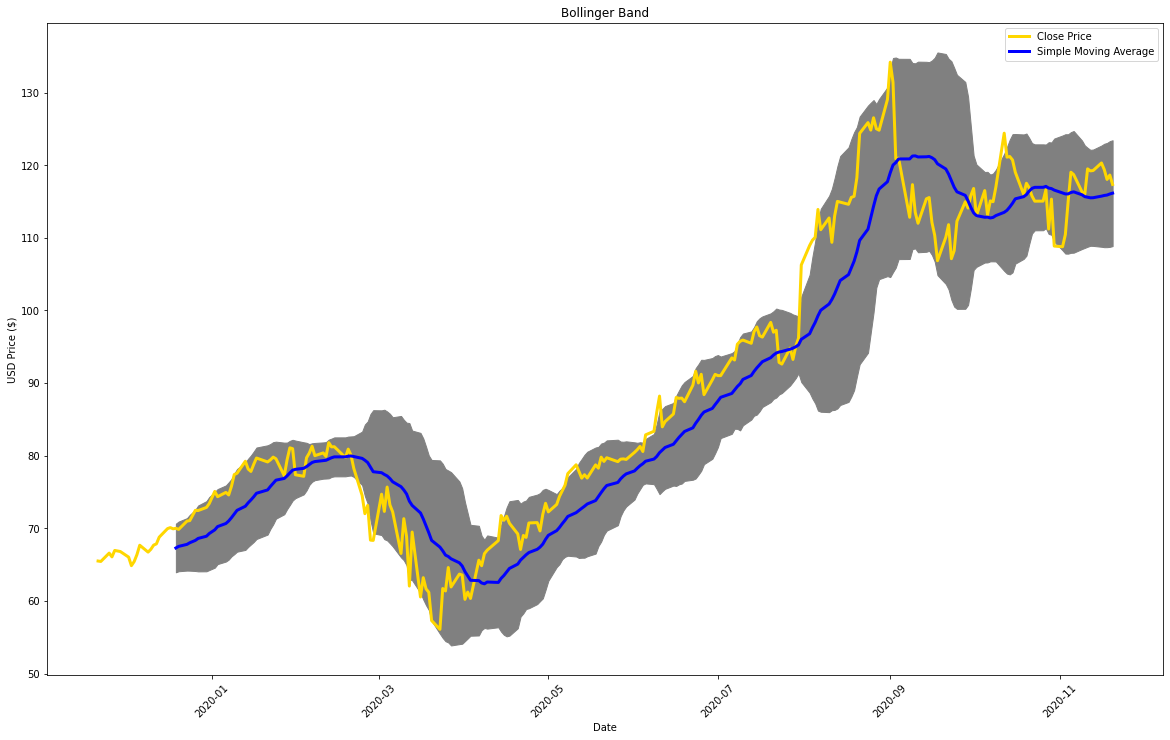

In [21]:
#Plot and shade the area between the two Bollinger Bands 

#Get the figure and the figure size 
fig = plt.figure(figsize=(20,12))
#Add the subplot 
ax = fig.add_subplot(1,1,1)
#Get the index values of the data frame 
x_axis = file.index
#Plot and shade the area between the upper and the lower band grey
ax.fill_between(x_axis, file['Upper'], file['Lower'], color = 'grey')
#Plot the closing price and the moving average 
ax.plot(x_axis, file['Close'], color = 'gold', lw = 3, label = 'Close Price')
ax.plot(x_axis, file['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Average')

#Set the title and show the image 
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show()


In [8]:
#Create a new data frame 
new_file = file[period-1:]
new_file

,Date,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper,Lower
2019-12-19,2019-12-19,69.875000,70.294998,69.737503,70.004997,68.841965,98369200,67.299875,1.674279,70.648433,63.951316
2019-12-20,2019-12-20,70.557503,70.662498,69.639999,69.860001,68.699387,275978000,67.517749,1.711191,70.940131,64.095367
2019-12-23,2019-12-23,70.132500,71.062500,70.092499,71.000000,69.820442,98572000,67.795499,1.805287,71.406074,64.184924
2019-12-24,2019-12-24,71.172501,71.222504,70.730003,71.067497,69.886818,48478800,68.019249,1.921892,71.863032,64.175466
2019-12-26,2019-12-26,71.205002,72.495003,71.175003,72.477501,71.273392,93121200,68.339499,2.105315,72.550129,64.128870
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-16,2020-11-16,118.919998,120.989998,118.150002,120.300003,120.300003,91183000,115.731500,3.484816,122.701132,108.761868
2020-11-17,2020-11-17,119.550003,120.669998,118.959999,119.389999,119.389999,74271000,115.825500,3.559862,122.945224,108.705776
2020-11-18,2020-11-18,118.610001,119.820000,118.000000,118.029999,118.029999,76322100,115.883500,3.587121,123.057742,108.709258
2020-11-19,2020-11-19,117.589996,119.059998,116.809998,118.639999,118.639999,74113000,116.028000,3.639290,123.306579,108.749420


In [16]:
#Create a function to get the buy and sell signals 

def get_signal(data):
    
    buy_signal = []
    sell_signal = []
    
    for i in range(len(data['Close'])):
        if file['Close'][i] > data['Upper'][i]: 
            #You should sell
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
        elif file['Close'][i] < data['Lower'][i]: 
            #You should buy
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
        else: 
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    
    return (buy_signal, sell_signal)

In [17]:
#Create two new columns
new_file['Buy'] = get_signal(new_file)[0]
new_file['Sell'] = get_signal(new_file)[1]

<ipython-input-17-b0e4104d46ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_file['Buy'] = get_signal(new_file)[0]
<ipython-input-17-b0e4104d46ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_file['Sell'] = get_signal(new_file)[1]


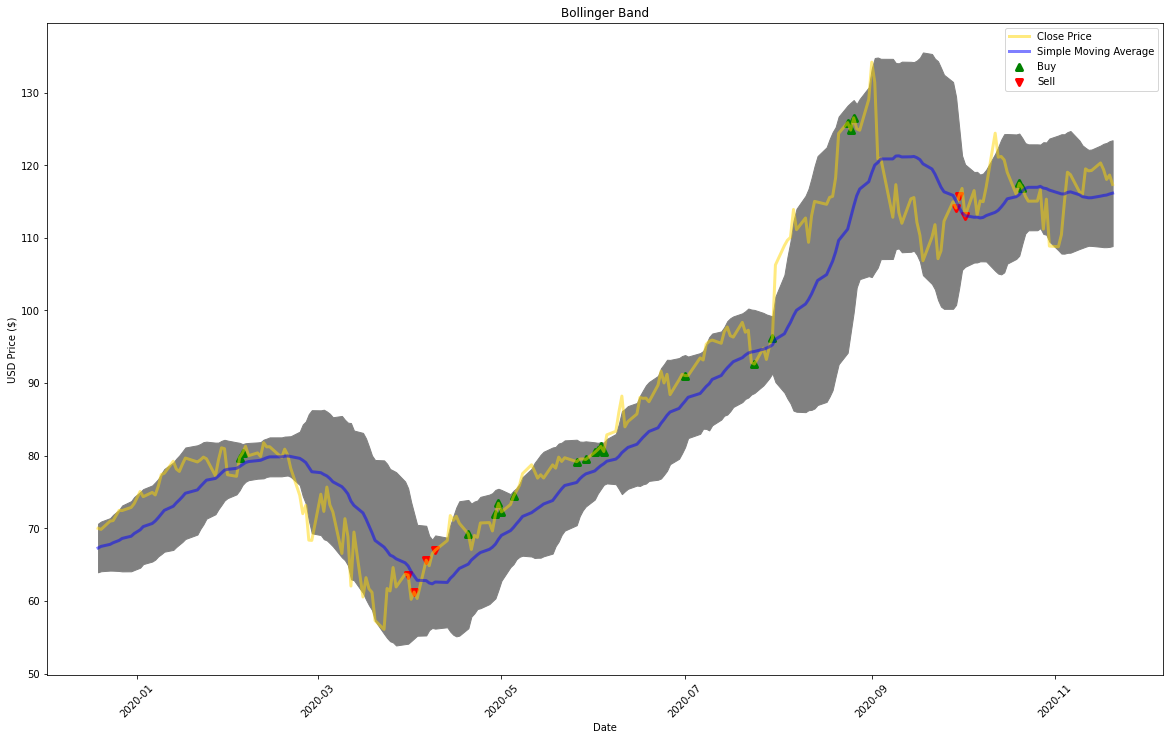

In [20]:
#Plot all of the data 

#Get the figure and the figure size 
fig = plt.figure(figsize=(20,12))
#Add the subplot 
ax = fig.add_subplot(1,1,1)
#Get the index values of the data frame 
x_axis = new_file.index
#Plot and shade the area between the upper and the lower band grey
ax.fill_between(x_axis, new_file['Upper'], new_file['Lower'], color = 'grey')
#Plot the closing price and the moving average 
ax.plot(x_axis, new_file['Close'], color = 'gold', lw = 3, label = 'Close Price', alpha = 0.5)
ax.plot(x_axis, new_file['SMA'], color = 'blue', lw = 3, label = 'Simple Moving Average', alpha = 0.5)
ax.scatter(x_axis, new_file['Buy'], color = 'green', lw = 3, label = 'Buy', marker = '^', alpha = 1)
ax.scatter(x_axis, new_file['Sell'], color = 'red', lw = 3, label = 'Sell', marker = 'v', alpha = 1)
#Set the title and show the image 
ax.set_title('Bollinger Band')
ax.set_xlabel('Date')
ax.set_ylabel('USD Price ($)')
plt.xticks(rotation = 45)
ax.legend()
plt.show()